<a href="https://colab.research.google.com/github/himalachudel/FDSFE_HAcharya/blob/main/HW5/Final_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

---

###Data

The data used in this assignment contains a cleaned and curated version of the market real estate valuations collected from Sindian Dist., New Taipei City, Taiwan, by Prof. I-Cheng Yeh, Department of Civil Engineering, Tamkang University, Taiwan.

The features in the data are the following:

* ```transaction_date```: the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* ```house_age```: the house age (unit: year)
* ```distance_nearest_MRT_station```: the distance to the nearest MRT station (unit: meter)
* ```convenience_stores```: the number of convenience stores in the living circle on foot (integer)

The target is:
* ```house_price_unit_area```house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

---

## HW instructions:

Similar to what was done in class, your task is to do the following:
1.   create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

2.   create a multiple regression model that utilizes all features in the dataset to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

--

In [ ]:
# -- import libraries here
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

Read the data file from the class repo which can be found in the folder "data" and is called "Real_estate.csv"

In [ ]:
realstate=pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/main/data/Real_estate.csv")

In [ ]:
realstate

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1
...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5


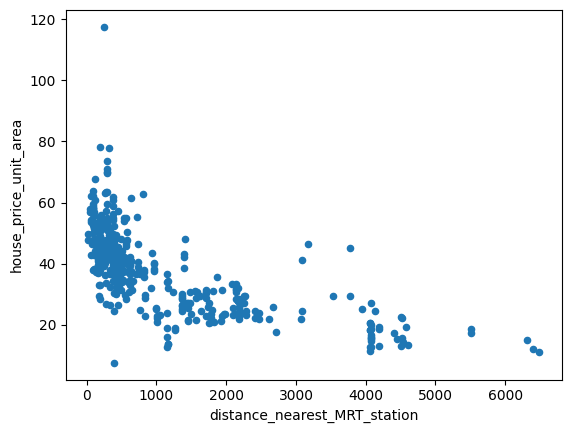

In [ ]:
realstate.plot("distance_nearest_MRT_station", "house_price_unit_area", kind="scatter");

Calculate the log10 of the ```distance_nearest_MRT_station``` column and add it as a new column to the data frame

In [ ]:
realstate["distance_nearest_MRT_station"] = np.log10(realstate.distance_nearest_MRT_station)

# Task 1: simple linear regression using statsmodel

create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

---


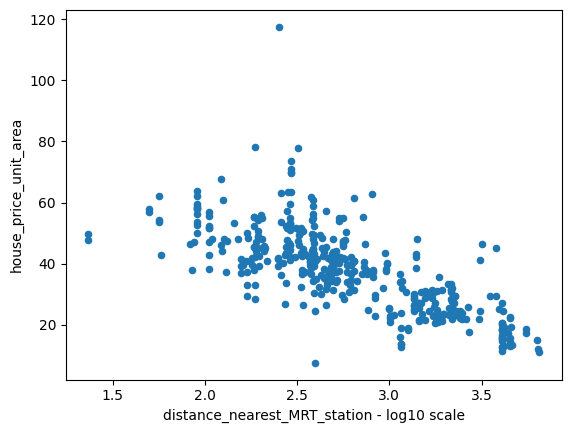

In [ ]:
ax = realstate.plot("distance_nearest_MRT_station", "house_price_unit_area", kind="scatter")
ax.set_xlabel("distance_nearest_MRT_station - log10 scale");

Using the code library of your choice, fit a linear regression model to the data

**Using seaborn**

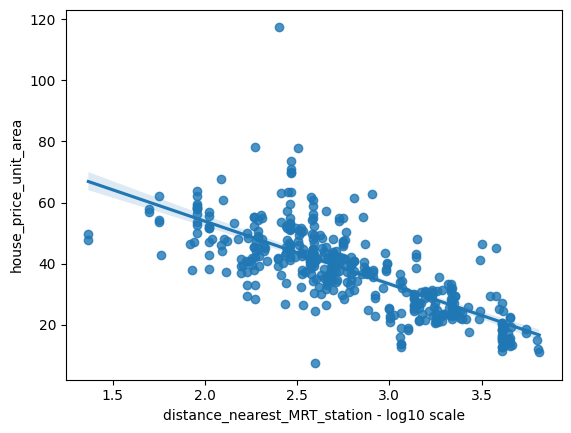

In [ ]:
import seaborn as sns
ax = sns.regplot(x=realstate['distance_nearest_MRT_station'], y=realstate['house_price_unit_area'])
ax.set_xlabel("distance_nearest_MRT_station - log10 scale");


#**Using stats model**

In [ ]:
import statsmodels.api as sm
# Let's declare our X and y variables
X = realstate['distance_nearest_MRT_station']
y = realstate['house_price_unit_area']
# With Statsmodels, we need to add our intercept term, B0, manually
X = sm.add_constant(X)
X.head()

,const,distance_nearest_MRT_station
0,1.0,1.928799
1,1.0,2.486565
2,1.0,2.749724
3,1.0,2.749724
4,1.0,2.591697


In [ ]:
model = sm.OLS(endog=y, exog=X)
results = model.fit()
# Show the summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     house_price_unit_area   R-squared:                       0.539
Model:                               OLS   Adj. R-squared:                  0.538
Method:                    Least Squares   F-statistic:                     482.2
Date:                   Tue, 17 Oct 2023   Prob (F-statistic):           2.52e-71
Time:                           18:09:18   Log-Likelihood:                -1507.3
No. Observations:                    414   AIC:                             3019.
Df Residuals:                        412   BIC:                             3027.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           95.0169      2.637     36.034      0.000      89.833     100.200
distance_nearest_MRT_station   -20.5472      0.936    -21.959      0.000     -22.387     -18.708
==============================================================================
Omnibus:                      178.772   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1764.720
Skew:                           1.566   Prob(JB):                         0.00
Kurtosis:                      12.617   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#alternative: statsmodel formula that could be useful if you wanted to create more complicated models
import statsmodels.formula.api as smf

In [ ]:
mod = smf.ols(formula='house_price_unit_area ~ distance_nearest_MRT_station', data=realstate)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     house_price_unit_area   R-squared:                       0.539
Model:                               OLS   Adj. R-squared:                  0.538
Method:                    Least Squares   F-statistic:                     482.2
Date:                   Tue, 17 Oct 2023   Prob (F-statistic):           2.52e-71
Time:                           18:09:18   Log-Likelihood:                -1507.3
No. Observations:                    414   AIC:                             3019.
Df Residuals:                        412   BIC:                             3027.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       95.0169      2.637     36.034      0.000      89.833     100.200
distance_nearest_MRT_station   -20.5472      0.936    -21.959      0.000     -22.387     -18.708
==============================================================================
Omnibus:                      178.772   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1764.720
Skew:                           1.566   Prob(JB):                         0.00
Kurtosis:                      12.617   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R^2 is 0.539 and adjusted R^2 is 0.538 and coefficent slope is 95.0169**

In [ ]:
res.predict()

array([55.38543575, 43.92491942, 38.51772409, 38.51772409, 41.76474156,
       26.44129298, 37.59118126, 44.49555602, 18.1433682 , 28.21390145,
       41.4362597 , 54.81754532, 39.70032057, 25.30771868, 32.01368836,
       38.24834125, 44.32970512, 42.72170211, 42.29256752, 66.88985663,
       26.03685141, 44.7610231 , 30.63049669, 44.7610231 , 39.91189885,
       29.82954397, 41.91928792, 44.84850832, 38.58956952, 40.47614137,
       19.91461003, 35.71447422, 39.76689412, 43.44169695, 47.50083079,
       20.82917503, 27.48472636, 30.63049669, 38.2675707 , 44.44227703,
       20.82349602, 20.85728647, 39.21983852, 39.33524067, 38.9822817 ,
       39.76239123, 40.22810696, 37.3474194 , 19.7462952 , 19.93305192,
       39.33939028, 28.33874681, 30.13016364, 39.70032057, 44.44227703,
       32.0459678 , 42.21742159, 59.02123969, 19.93305192, 43.1062492 ,
       27.50227701, 45.40757302, 26.43781865, 38.9822817 , 33.41321703,
       52.02142823, 48.02807359, 53.50323395, 40.22309424, 38.51

In [ ]:
res.params

Intercept                       95.016865
distance_nearest_MRT_station   -20.547202
dtype: float64

In [ ]:
res.conf_int()

,0,1
Intercept,89.833471,100.200258
distance_nearest_MRT_station,-22.386553,-18.707851


In [ ]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(res, alpha=0.05)
data.shape

(414, 12)

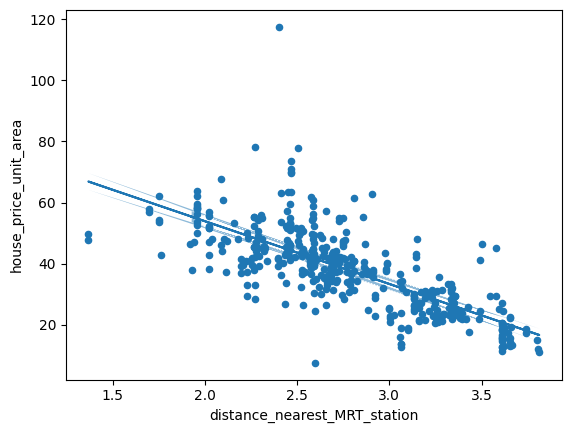

In [ ]:
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,4:6].T
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
ax = realstate.plot("distance_nearest_MRT_station", "house_price_unit_area", kind="scatter")
ax.plot(realstate.distance_nearest_MRT_station, res.predict(realstate))
ax.fill_between(realstate.distance_nearest_MRT_station.values, predict_ci_low, predict_ci_upp, alpha=0.5)

From looking at the coefficient, what can you say about the relationship between the feature (the distance to the nearest MRT station) and the target (the house price/unit area)?

*your answer here*

Plot the actual vs. model predicted values for the house price/unit area for all log10(distance to MRT station) values in the data

In [ ]:
# -- your code here


#Linear regression using sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
features1=realstate[["distance_nearest_MRT_station"]]
target1=realstate["house_price_unit_area"]

##Standarization

In [ ]:
features_s1=(features1-features1.mean())/features1.std()
target_s1=(target1-target1.mean())/target1.std()

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(features_s1,target_s1)

LinearRegression()

In [ ]:
predictions = model.predict(features_s1)

In [ ]:
r2=model.score(features_s1,target_s1)

In [ ]:
r2

0.5392532390657542

**Thus the r^2 is 0.53**

**Using the .format() method in print to show the two values and round them to 3 decimal places**

In [ ]:
print("r^2 of the model = {0:3f}%".format(model.score(features_s1,target_s1)*100))

r^2 of the model = 53.925324%


In [ ]:
num_data_points = features_s1.shape[0]

In [ ]:
num_predictors = features_s1.shape[1]

In [ ]:
adjusted_r2 = 1 - (1 - r2) * (num_data_points - 1) / (num_data_points - num_predictors - 1)

In [ ]:
adjusted_r2

0.5381349216848458

**The adjusted r2 is 0.53**

In [ ]:
model.predict(features_s1)

array([ 1.27918702,  0.4369038 ,  0.03950548,  0.03950548,  0.27814293,
       -0.848044  , -0.02859018,  0.47884237, -1.45789461, -0.71776729,
        0.25400137,  1.23745029,  0.12641964, -0.93135531, -0.43850441,
        0.01970736,  0.46665326,  0.34847412,  0.31693515,  2.12469699,
       -0.87776817,  0.4983527 , -0.54016119,  0.4983527 ,  0.14196945,
       -0.59902669,  0.28950121,  0.50478237,  0.04478572,  0.18343809,
       -1.32771834, -0.16651755,  0.13131242,  0.40138968,  0.69971309,
       -1.26050297, -0.77135754, -0.54016119,  0.02112062,  0.47492666,
       -1.26092035, -1.25843694,  0.09110693,  0.09958833,  0.07364784,
        0.13098149,  0.16520896, -0.0465053 , -1.34008853, -1.32636296,
        0.09989331, -0.70859186, -0.57693284,  0.12641964,  0.47492666,
       -0.43613205,  0.31141235,  1.54639808, -1.32636296,  0.37673616,
       -0.77006767,  0.54587047, -0.84829934,  0.07364784, -0.33564696,
        1.03195147,  0.73846246,  1.14085582,  0.16484056,  0.03

Print the coefficient (slope) of the line

In [ ]:
model.coef_


array([-0.73433864])

The coefficent is -0.734. That means is we change this variable "distance_nearest_MRT_station" by one unit, then there would be change in target variable "housing_price_unit_area" by 0.74 in negative direction.

In [ ]:
model.intercept_

-7.789490616431278e-17

# Task 2: multiple linear regression (all variables)

create a multiple regression model that utilizes all features to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

---

a univariate linear regression model looks like $y = a_0 + a_1 x$

a multivariate linear regression model with 3 exogenous variable looks like $y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3$

The easiest way to implement it is to use `statsmodels.formula.api` which allows to write out the formula you want to use for the regression in more or less plain English. We did it in the linear regression notebook https://github.com/fedhere/FDSFE_FBianco/blob/main/HW5/linear_regression_in_detail.ipynb

The univariate linear model we built in that notebook was

```
import statsmodels.formula.api as smf
     
mod = smf.ols(formula='wspeed ~ population', data=df)
res = mod.fit()
res.summary()
```

y = ax + b => `formula='wspeed ~ population'`

The intercept (b) is implied in the use of `~`
`x` in this case was population and `y` wspeed

Your formula will look like
`formula='y ~ x1 + x2 + x3 + x4'` with the approproate feature names

In [ ]:
realstate

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
0,2012.917,32.0,1.928799,10,37.9
1,2012.917,19.5,2.486565,9,42.2
2,2013.583,13.3,2.749724,5,47.3
3,2013.500,13.3,2.749724,5,54.8
4,2012.833,5.0,2.591697,5,43.1
...,...,...,...,...,...
409,2013.000,13.7,3.610875,0,15.4
410,2012.667,5.6,1.956438,9,50.0
411,2013.250,18.8,2.592143,7,40.6
412,2013.000,8.1,2.020403,5,52.5


#Multiple regression without standarization

In [ ]:
features=realstate[["house_age","convenience_stores","distance_nearest_MRT_station","transaction_date"]]
target=realstate["house_price_unit_area"]

In [ ]:
features.shape

(414, 4)

In [ ]:
target.shape

(414,)

In [ ]:
mlr=LinearRegression()

In [ ]:
mlr.fit(features,target)

LinearRegression()

In [ ]:
print("r^2 of the model = {0:1f}%".format(mlr.score(features,target)*100))

r^2 of the model = 60.125702%


In [ ]:
mlr.intercept_

-14689.21202683457

In [ ]:
mlr.coef_

array([ -0.21111288,   0.63501852, -17.99345898,   7.34087723])

In [ ]:
realstate["prediction"]=mlr.predict(features)

In [ ]:
realstate.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area,prediction
0,2012.917,32.0,1.928799,10,37.9,52.253354
1,2012.917,19.5,2.486565,9,42.2,44.221119
2,2013.583,13.3,2.749724,5,47.3,43.143816
3,2013.500,13.3,2.749724,5,54.8,42.534523
4,2012.833,5.0,2.591697,5,43.1,42.233851


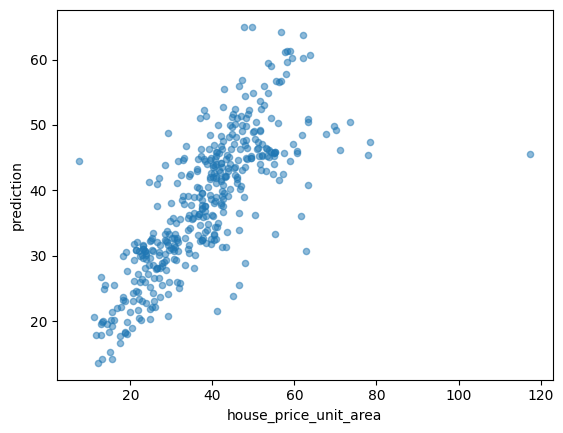

In [ ]:
realstate.plot("house_price_unit_area","prediction",kind ="scatter",alpha=0.5);

In [ ]:
features

,house_age,convenience_stores,distance_nearest_MRT_station,transaction_date
0,32.0,10,1.928799,2012.917
1,19.5,9,2.486565,2012.917
2,13.3,5,2.749724,2013.583
3,13.3,5,2.749724,2013.500
4,5.0,5,2.591697,2012.833
...,...,...,...,...
409,13.7,0,3.610875,2013.000
410,5.6,9,1.956438,2012.667
411,18.8,7,2.592143,2013.250
412,8.1,5,2.020403,2013.000


#Standarization for multiple regression

In [ ]:
features_s=(features-features.mean())/features.std()
target_s=(target-target.mean())/target.std()

**Multiple regression after standarization**

In [ ]:
mlr_s=LinearRegression()

In [ ]:
mlr_s.fit(features_s,target_s)

LinearRegression()

In [ ]:
mlr.score(features,target)

0.6012570203149735

In [ ]:
r2=mlr_s.score(features_s,target_s)

In [ ]:
r2

0.6012570203149734

**Thus r2 is 0.60, there is no change in r2 before and after standarization**

**With addition of other features r2 imporved to some extent from earlier value of 0.53 to 0.60**

In [ ]:
num_data_points = features_s.shape[0]

In [ ]:
num_predictors = features_s.shape[1]

In [ ]:
adjusted_r2 = 1 - (1 - r2) * (num_data_points - 1) / (num_data_points - num_predictors - 1)

In [ ]:
adjusted_r2

0.5973573334720881

**Adjusted r2 is 0.59**

In [ ]:
mlr.coef_

array([ -0.21111288,   0.63501852, -17.99345898,   7.34087723])

In [ ]:
mlr_s.coef_

array([-0.17676128,  0.13747018, -0.64307016,  0.152125  ])

**distance_nearest_MRT_station and house age have negative correlation distance_nearest_MRT_station has higher correlation than house age. Other two features have positive but low correlation.**

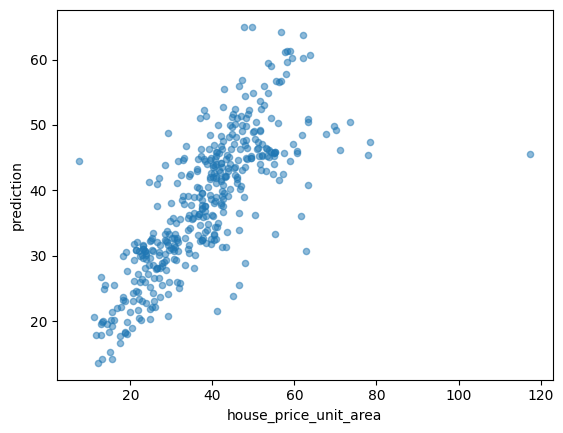

In [ ]:
realstate.plot("house_price_unit_area","prediction",kind ="scatter",alpha=0.5);